In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


### Data exploration


In [3]:
data = pd.read_csv("data/test.txt", sep=";")
data.head()


,ZIBZIN,IDAvisAutorisAtionCheque,MontAnt,DAteTrAnsAction,CodeDecision,VerifiAnceCPT1,VerifiAnceCPT2,VerifiAnceCPT3,D2CB,ScoringFP1,...,TAuxImpNB_CPM,EcArtNumCheq,NbrMAgAsin3J,DiffDAteTr1,DiffDAteTr2,DiffDAteTr3,CA3TRetMtt,CA3TR,Heure,FlAgImpAye
0,A013000077908486718390030,75525799,"45,409999999999997",2016-09-20 07:33:50,0,1,1,1,551,0,...,"39,274924471299094",0,1,4,4,4,"45,409999999999997",0,27230,0
1,A056016006908021653208910,75525802,"62,060000000000002",2016-09-20 08:05:18,0,1,1,1,1,0,...,"12,586532410320956",0,1,5,5,5,"62,060000000000002",0,29118,0
2,A083019106908043612476153,75525805,"16,43",2016-09-20 08:06:20,0,0,0,0,302,"1,3600993377483443E-2",...,"24,301336573511541",3,1,"0,99767361111111108","1,9716319444444443","2,992962962962963","61,169999999999995","44,739999999999995",29180,0
3,A008010087908375620025601,75525810,"72,519999999999996",2016-09-20 08:22:04,0,1,1,1,1,0,...,"4,7236655644780345",0,1,5,5,5,"72,519999999999996",0,30124,0
4,A013010041908016789940729,75525812,10,2016-09-20 08:27:19,0,0,0,0,511,0,...,"39,274924471299094",0,1,4,4,4,10,0,30439,0


In [4]:
data.describe()


,IDAvisAutorisAtionCheque,CodeDecision,VerifiAnceCPT1,VerifiAnceCPT2,VerifiAnceCPT3,D2CB,EcArtNumCheq,NbrMAgAsin3J,Heure,FlAgImpAye
count,2.641430e+05,264143.000000,264143.000000,264143.000000,264143.000000,264143.000000,2.641430e+05,264143.000000,264143.000000,264143.000000
mean,7.584893e+07,0.014473,0.392579,0.418868,0.464972,234.201769,5.758895e+03,1.032562,53541.022670,0.003237
std,1.897321e+05,0.175802,0.519606,0.588430,0.712331,208.760007,1.583986e+05,0.183899,11729.169206,0.056802
min,7.552580e+07,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000e+00,1.000000,26669.000000,0.000000
25%,7.568505e+07,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000e+00,1.000000,42647.000000,0.000000
50%,7.584113e+07,0.000000,0.000000,0.000000,0.000000,212.000000,0.000000e+00,1.000000,55059.000000,0.000000
75%,7.600519e+07,0.000000,1.000000,1.000000,1.000000,448.000000,0.000000e+00,1.000000,63779.000000,0.000000
max,7.619241e+07,3.000000,10.000000,17.000000,36.000000,551.000000,9.948073e+06,10.000000,79676.000000,1.000000


In [5]:
# there is not null data in our dataset columns
data.isnull().sum()


ZIBZIN                      0
IDAvisAutorisAtionCheque    0
MontAnt                     0
DAteTrAnsAction             0
CodeDecision                0
VerifiAnceCPT1              0
VerifiAnceCPT2              0
VerifiAnceCPT3              0
D2CB                        0
ScoringFP1                  0
ScoringFP2                  0
ScoringFP3                  0
TAuxImpNb_RB                0
TAuxImpNB_CPM               0
EcArtNumCheq                0
NbrMAgAsin3J                0
DiffDAteTr1                 0
DiffDAteTr2                 0
DiffDAteTr3                 0
CA3TRetMtt                  0
CA3TR                       0
Heure                       0
FlAgImpAye                  0
dtype: int64

In [6]:
data.columns


Index(['ZIBZIN', 'IDAvisAutorisAtionCheque', 'MontAnt', 'DAteTrAnsAction',
       'CodeDecision', 'VerifiAnceCPT1', 'VerifiAnceCPT2', 'VerifiAnceCPT3',
       'D2CB', 'ScoringFP1', 'ScoringFP2', 'ScoringFP3', 'TAuxImpNb_RB',
       'TAuxImpNB_CPM', 'EcArtNumCheq', 'NbrMAgAsin3J', 'DiffDAteTr1',
       'DiffDAteTr2', 'DiffDAteTr3', 'CA3TRetMtt', 'CA3TR', 'Heure',
       'FlAgImpAye'],
      dtype='object')

In [7]:
rows = len(data)
fraud_flag = data['FlAgImpAye'].value_counts()
print(f'Not Frauds { fraud_flag[0] } \t represents { round((fraud_flag[0] / rows) * 100, 3) } %')
print(f'Frauds { fraud_flag[1] } \t\t represents { round((fraud_flag[1] / rows) * 100, 3) } %')


No Frauds 263288 	 represents 99.676 %
Frauds 855 		 represents 0.324 %


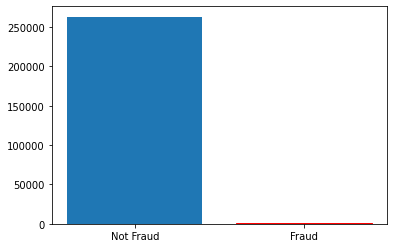

In [15]:
barchart_frauds = plt.bar(['Not Fraud', 'Fraud'], [fraud_flag[0], fraud_flag[1]])
barchart_frauds[1].set_color('r')